![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)

# **Proyecto 1 - MDS7202 Laboratorio de Programación Científica para Ciencia de Datos 📚**

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

*Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir.*

### Equipo:

- Marcelo Rojas B.
- Sebastián Sanhueza O.


### Link de repositorio de GitHub: `https://github.com/Marcelorojasb/MDS7202`

Fecha límite de entrega 📆: 27 de Octubre de 2023.

----

## Reglas

- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.

<div style="text-align: center;">
    <img src="https://worldskateamerica.org/wp-content/uploads/2023/07/SANTIAGO-2023-1-768x153.jpg" alt="Descripción de la imagen">
</div>

En un Chile azotado por un profundo caos político-económico y el resurgimiento de programas de televisión de dudosa calidad, todas las miradas y esperanzas son depositadas en el éxito de un único evento: Santiago 2023. La nación necesitaba desesperadamente un respiro, y los Juegos de Santiago 2023 prometían ser una luz al final del túnel.

El Presidente de la República -conocido en las calles como Bombín-, consciente de la importancia de este evento para la revitalización del país, decide convocar a usted y su equipo en calidad de expertos en análisis de datos y estadísticas. Con gran solemnidad, el presidente les encomienda una importante y peligrosa: liderar un proyecto que permitiera caracterizar de forma automática y eficiente los datos generados por estos magnos juegos. Para esto, el presidente le destaca que la solución debe considerar los siguientes puntos:
- Caracterización automática de los datos
- La solución debe ser compatible con cualquier dataset
- Se les facilita el dataset *olimpiadas.parquet*, el cual recopila data de diferentes juegos olímpicos realizados en los últimos años

## 1.0 Librerías

In [ ]:
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.3 MB/s eta 0:00:00


In [ ]:
import fastparquet
from datetime import date
import inspect
import itertools
import matplotlib.pyplot as plt
import numpy as np
import re
import os, shutil
import pandas as pd
from pandas.api.types import is_numeric_dtype
import pyarrow
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.base import is_classifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn import set_config
import plotly.express as px
import plotly.graph_objects as go

###**Indicación: Se recomienda ejecutar las celdas de código en orden.**

## 1.1 Creación de `Profiler` Class (4.0 puntos)

Cree la clase `Profiler`. Como mínimo, esta debe tener las siguientes funcionalidades:

1. El método constructor, el cual debe recibir los datos a procesar en formato `Pandas DataFrame`. Además, este método debe generar una carpeta en su directorio de trabajo con el nombre `EDA_fecha`, donde `fecha` corresponda a la fecha de ejecución en formato `DD-MM-YYYY`.

2. El método `summarize`, el cual debe caracterizar las variables del Dataset. Como mínimo, se espera que su método pueda:
    - Implementar una funcionalidad para filtrar y aplicar este método a una o más variables de interés.
    - Reportar el tipo de variable
    - Reportar el número y/o porcentaje de valores únicos de la variable
    - Reportar el número y/o porcentaje de valores nulos
    - Si la variables es numérica:
        - Reportar el número y/o porcentaje de valores cero, negativos y outliers
        - Reportar estadística descriptiva como el valor mínimo, máximo, promedio y los percentiles 25, 50, 75 y 100
   - Levantar una alerta en caso de encontrar alguna anomalía fuera de lo común (el criterio debe ser ajustable por el usuario)
   - Guardar sus resultados en el directorio `EDA_fecha/summary.txt`. El archivo debe separar de forma clara y ordenada los resultados de cada punto.

3. El método `plot_vars`, el cual debe graficar la distribución e interraciones de las variables del Dataset. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/plots`
    - Implementar una funcionalidad para filtrar y aplicar este método a una o más variables de interés.
    - Para las variables numéricas:
        - Genere un gráfico de distribución de densidad
        - Grafique la correlación entre las variables
    - Para las variables categóricas:
        - Genere un histograma de las top N categorías (N debe ser un parámetro ajustable)
        - Grafique el coeficiente V de Cramer entre las variables
    - Guardar cada gráfico generado en la carpeta `EDA_fecha/plots` en formato `.pdf` y bajo el naming `variable.pdf`, donde `variable` es el nombre de la variable de interés
    
4. El método `clean_data`, el cual debe limpiar los datos para que luego puedan ser procesados. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/clean_data`
    - Implementar una funcionalidad para filtrar y aplicar este método a una o más variables de interés.
    - Drop de valores duplicados
    - Implementar como mínimo 2 técnicas para tratar los valores nulos, como:
        - Drop de valores nulos
        - Imputar valores nulos con alguna técnica de imputación
        - Funcionalidad para escoger entre una técnica y la otra.
    - Una de las columnas del dataframe presenta datos *no atómicos*. Separe dicha columna en las columnas que la compongan.
        - Hint: ¿Qué caracteres permiten separar una columna de otra?
        - Para las pruebas con el dataset nuevo, puede esperar que exista al menos una columna con este tipo de problema. Asuma que los separadores serán los mismos, aunque el número de columnas a separar puede ser distinto.
    - Deberían usar `FunctionTransformer`.
    - Guardar los datos procesados en formato `.csv` en el path `EDA_fecha/clean_data/data.csv`

5. El método `scale`, el cual debe preparar adecuadamente los datos para luego ser consumidos por algún tipo de algoritmo. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/scale`
    - Procesar de forma adecuada los datos numéricos y categóricos:
        - Su método debe recibir las técnicas de escalamiento como argumento de entrada (utilizar solo técnicas compatibles con el framework de `sklearn`)
        - Para los atributos numéricos, se transforme los datos con un escalador logarítmico y un `MinMaxScaler`
        - Asuma que no existen datos ordinales en su dataset
    - Guardar todo este procesamiento en un `ColumnTransformer`.
    - Guardar los datos limpios y transformados en formato `.csv` en el path `EDA_fecha/process/scaled_features.csv`

6. El método `make_clusters`, el cual debe generar clusters de los datos usando algún algoritmo de clusterización. Como mínimo, se espera que su método pueda:
    - Crear la carpeta `EDA_fecha/clusters`
    - Generar un estudio del codo donde señale la cantidad de clusters optimos para el desarrollo.
    - Su método debe recibir el algoritmo de clustering como argumento de entrada (utilizar solo algoritmos compatibles con el framework de `sklearn`).
    - No olvide pre procesar adecuadamente los datos antes de implementar la técnica de clustering.
    - En este punto es espera que generen un `Pipeline` de sklearn. Además, su método debería usar lo construido en los puntos 4 y 5.
    - Su método debe ser capaz de funcionar a partir de datos crudos (se descontará puntaje de lo contrario).
    - Una vez generado los clusters, proyecte los datos a 2 dimensiones usando su técnica de reducción de dimensionalidad favorita y grafique los resultados coloreando por cluster.
    - Guardar los datos con su respectivo cluster en formato `.csv` en el path `EDA_fecha/clusters/data_clusters.csv`. Guarde también los gráficos generados en el mismo path.

7. El método `detect_anomalies`, el cual debe detectar anomalías en los datos. Como mínimo, se espera que su método pueda:

    - Crear la carpeta `EDA_fecha/anomalies`
    - Implementar alguna técnica de detección de anomalías.
    - Al igual que el punto anterior, su método debe considerar los siguientes puntos:
        - No olvide pre procesar de forma adecuada los datos antes de implementar la técnica de detección de anomalía.
        - En este punto es espera que generen un `Pipeline` de sklearn. Además, su método debería usar lo construido en los puntos 4 y 5.
        - Su método debe ser capaz de funcionar a partir de datos crudos (se descontará puntaje de lo contrario).
        - Su método debe recibir el algoritmo como argumento de entrada
        - Una vez generado las etiquetas, proyecte los datos a 2 dimensiones y grafique los resultados coloreando por las etiquetas predichas por el detector de anomalías
    - Guardar los datos con su respectiva etiqueta en formato `.csv` en el path `EDA_fecha/anomalies/data_anomalies.csv`. Guarde también los gráficos generados en el mismo path.

8. El método `profile`, el cual debe ejecutar todos los métodos anteriores.

9. Crear el método `clearGarbage` para eliminar las carpetas/archivos creados/as por la clase `Profiler`.

Algunas consideraciones generales:
- Su clase será testeada con datos tabulares diferentes a los provistos. No desarrollen código *hardcodeado*: su clase debe ser capaz de funcionar para **cualquier** dataset.
- Aplique todo su conocimiento sobre buenas prácticas de programación: se evaluará que su código sea limpio y ordenado.
- Recuerden documentar cada una de las funcionalidades que implementen.
- Recuerden adjuntar sus `requirements.txt` junto a su entrega de proyecto. **El código que no se pueda ejecutar por imcompatibilidades de librerías no será corregido.**

In [ ]:
class Profiler():
    def __init__(self, data):
      """Inicializa la instancia de la clase. Verifica que la entrada sea un
      objeto del tipo DataFrame de Pandas y, si es así, crea una carpeta con
      el nombre 'EDA_fecha', en la que 'fecha' corresponde a la fecha de ejecución
      en el formato DD-MM-YYYY.

      Parameters:
      -----------
      data: pandas.DataFrame
         Datos de entrada a analizar.

      Returns:
      -----------
      None

      Raises:
      -----------
      ValueError: Se lanza una excepción si la entrada no es un DataFrame de pandas.

      """
      self.data = data # Registra la data de entrada

      # Verifica si la data de entrada es de tipo DataFrame de pandas
      if not isinstance(self.data, pd.DataFrame):
        raise ValueError("El dataset ingresado no es un DataFrame de pandas.")

      # Obtiene la fecha actual en formato DD-MM-YYYY
      current_date = date.today().strftime("%d-%m-%Y")
      # Nombre de carpeta
      dir_name = "EDA_" + current_date
      # Registra el nombre de la carpeta para su posterior uso
      self.dir_name = dir_name

      # Verifica si la carpeta ya existe
      if not os.path.exists(dir_name):
        # Crea la carpeta
        os.mkdir(dir_name)
        print(f"Carpeta '{dir_name}' creada con éxito.")
      else:
        print(f"La carpeta '{dir_name}' ya existe.")



    def sumarize(self,cols='all'):
      """Caracteriza las columnas seleccionadas del Dataset. Reporta el tipo de variable,
      el número de valores únicos de la columna y el número de valores nulos.
      Si la variables es numérica:
      Reporta el número de valores cero, negativos, outliers y estadística descriptiva
      (mínimo, máximo, promedio y los percentiles)

      Parameters:
      -----------
      cols: list, str,
        Lista con los índices de las columnas a seleccionar. Entregar 'all' si se quieren
        todas las columnas. (default 'all')
      Returns:
      -----------
      None

      """
      dataframe = self.data
      df_cols = dataframe.columns.values
      # Por default se muestran todas las columnas
      if cols == 'all':
        cols = range(len(df_cols))

      dataframe = dataframe.iloc[:,cols]
      # Escribe el encabezado
      print('#  Columna           Tipo   n°unicos n°Nan  ceros  n°neg n°out min    max    mean     p25      p50      p75      p100\n')
      output_file = os.path.join(self.dir_name, 'summary.txt')

      with open(output_file, 'w') as file:
        # Escribe el encabezado en el archivo
        file.write('#  Columna           Tipo   n°unicos n°Nan  ceros  n°neg n°out min    max    mean     p25      p50      p75      p100\n')
        for col in cols:
          col_name = df_cols[col]
          column = dataframe[col_name]
          tipo = column.dtype
          unique_values = len(column.unique())
          nan_values = column.isna().sum()
          if is_numeric_dtype(column.values):
            ceros = np.count_nonzero(column.values==0)
            negativos = len(column.values[column.values<0])
            promedio = round(np.mean(column.values),1)
            std = round(np.std(column.values),1)
            outliers = column.values[column.values>=promedio+3*std]
            outliers = column.values[column.values<=promedio-3*std]
            outliers = len(outliers)
            minimo = min(column.values)
            maximo = max(column.values)
            p25 = round(np.percentile(column.values, 25),1)
            p50 = round(np.percentile(column.values, 50),1)
            p75 = round(np.percentile(column.values, 75),1)
            p100 = round(np.percentile(column.values, 100),1)
            line = f'{"{:<2}".format(col)} {"{:<17}".format(col_name)} {"{:<6}".format(str(tipo))} {"{:<8}".format(str(unique_values))} {"{:<6}".format(str(nan_values))} {"{:<6}".format(str(ceros))} {"{:<5}".format(str(negativos))} {"{:<5}".format(str(outliers))} {"{:<6}".format(str(minimo))} {"{:<6}".format(str(maximo))} {"{:<8}".format(str(promedio))} {"{:<8}".format(str(p25))} {"{:<8}".format(str(p50))} {"{:<8}".format(str(p75))} {"{:<8}".format(str(p100))}\n'
          else:
            line = f'{"{:<2}".format(col)} {"{:<17}".format(col_name)} {"{:<6}".format(str(tipo))} {"{:<8}".format(str(unique_values))} {"{:<6}".format(str(nan_values))}\n'

          file.write(line)
          print(line)
      print(f'Resumen guardado en {output_file}')



    def plot_vars(self, variables, top_var=5):
      """Genera gráficos de densidad y calcula la matriz de correlación
      para variables numéricas, y para variables categóricas, genera histogramas
      con las principales categorías y un mapa de calor con el coeficiente de
      correlación V de Cramer.

      Parameters:
      -----------
      variables: list
          Lista con los nombres de las variables de interés.

      top_var: int, default=5
          Número de las principales categorías que se quieren
          graficar en las variables categóricas.

      Returns:
      -----------
      None

      """
      # CREACIÓN DE CARPETA

      folder_name = "plots" # Nombre de la carpeta
      path = os.path.join(self.dir_name, folder_name) # Dirección final de la carpeta
      # Verifica si la carpeta ya existe
      if not os.path.exists(path):
        # Crea la carpeta
        os.mkdir(path)
        print(f"Carpeta '{folder_name}' creada con éxito en el directorio '{self.dir_name}'.")
      else:
        print(f"La carpeta '{folder_name}' ya existe en el directorio '{self.dir_name}'.")

      copy_data = self.data.copy()
      num_var =[]
      cat_var = []
      for var in variables:
        # Verifica que las variables pertenezcan al dataset
        if var not in copy_data.columns:
          print(f"Variable '{var}' no encontrada en el dataset.")
          continue
        # Separa las variables que son numéricas y categóricas
        elif is_numeric_dtype(copy_data[var]):
          num_var.append(var)
        else:
          cat_var.append(var)

      # Genera un gráfico de distribución de densidad para cada
      # variable numérica
      for var in num_var:
        plt.figure(figsize=(8, 6))
        sns.kdeplot(copy_data[var], shade=True)
        plt.title(f'Distribución de {var}')
        plt.xlabel(var)
        plt.ylabel('Densidad')
        # Guarda el gráfico en la carpeta 'plots'
        plt.savefig(os.path.join(path, f'{var}.pdf'))
        plt.show()
        plt.close()

      # Calcula el coeficiente de correlación entre las variables numéricas
      # y lo grafica mediante un mapa de calor
      plt.figure(figsize=(8, 6))
      sns.heatmap(copy_data[num_var].corr(),)
      plt.title('Correlación entre variables numéricas')
      # Guarda el gráfico en la carpeta 'plots'
      plt.savefig(os.path.join(path, 'correlation_matrix.pdf'))
      plt.show()
      plt.close()

      # Genera un gráfico de histograma con las principales categorías
      # en cada una de las variables categóricas
      for var in cat_var:
        top_categories = copy_data[var].value_counts()[:top_var]
        plt.figure(figsize=(8, 6))
        top_categories.plot(kind='bar')
        plt.title(f'Principales {top_var} categorías de {var}')
        plt.xlabel(var)
        plt.ylabel('Frecuencia')
        # Guarda el gráfico en la carpeta 'plots'
        plt.savefig(os.path.join(path, f'{var}.pdf'))
        plt.show()
        plt.close()

      # Calcula el coeficiente de correlación V de Cramer entre las variables
      # categóricas y lo grafica mediante un mapa de calor.
      # Referencia: https://www.kaggle.com/code/phaethonprime/eda-and-logistic-regression/notebook
      corrM = np.zeros((len(variables), len(variables)))
      for var1, var2 in itertools.combinations_with_replacement(variables, 2):
        i, j = variables.index(var1), variables.index(var2)
        # Calcula la matriz de confusión entre dos variables del dataset
        confusion_matrix = pd.crosstab(copy_data[var1], copy_data[var2])
        # Calcula el coeficiente chi-cuadrado entre las variables
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.values.sum()
        minimum_dimension = min(confusion_matrix.shape) - 1
        # Calcula el coeficiente V de Cramer entre las variables
        corr_value = np.sqrt((chi2 / n) / minimum_dimension)
        # Se registra el resultado de tal forma que sea una metriz simétrica
        corrM[i, j] = corr_value
        corrM[j, i] = corr_value

      cramerM = pd.DataFrame(corrM, index=variables, columns=variables)
      plt.figure(figsize=(8, 6))
      sns.heatmap(cramerM, annot=True, fmt=".2f")
      plt.title('Coeficiente V Cramer entre variables categóricas.')
      # Guarda el gráfico en la carpeta 'plots'
      plt.savefig(os.path.join(path, 'V_Cramer_matrix.pdf'))
      plt.show()
      plt.close()



    def clean_data(self, variables, drop_na=True, impute_na=False):
      """Realiza una limpieza a los datos de un DataFrame para que puedan
         ser procesados. Realiza la separación de las variables con datos
         no atómicos, realiza tratamiento a los valores nulos y elimina
         los datos duplicados, respectivamente.

         Los archivos se guardan en un archivo .csv.

      Parameters:
      -----------
      variables: list
          Lista con los nombres de las variables de interés.

      drop_na: bool
          Indica que el tratamiento de los valores nulos debe ser eliminarlos.

      impute_na: bool
          Indica que el tratamiento de los valores nulos debe ser mediante la
          imputación de estos.

      Returns:
      -----------
      None

      """
      folder_name = "clean_data"
      path = os.path.join(self.dir_name, folder_name)
      # Verifica si la carpeta ya existe
      if not os.path.exists(path):
        # Crea la carpeta
        os.mkdir(path)
        print(f"Carpeta '{folder_name}' creada con éxito en el directorio '{self.dir_name}'.")
      else:
        print(f"La carpeta '{folder_name}' ya existe en el directorio '{self.dir_name}'.")

      copy_data = self.data.copy()

      if variables:
        copy_data = copy_data[variables]

      def clean_data_function(filtered_data):

          #NOTA: 1.-Separar columna con valores no atómicos. 2.-Tratamientos de datos NaN. 3.-Drop duplicados

          # Identifica las columnas con datos no atómicos
          separators = ['*', ':', '(', '?']
          combined_separator = '|'.join(map(re.escape, separators))
          non_atomic_cols = []
          for col in filtered_data.columns:
            if filtered_data[col].dtype == 'object' and filtered_data[col].str.contains(combined_separator).all():
              non_atomic_cols.append(col)

          # Separa los datos de la columna en sus columnas correspondiente
          for col in non_atomic_cols:
            split_data = filtered_data[col].str.split(combined_separator, expand=True)
            split_data.columns = re.findall(r'[a-zA-Z]+', col)
            for element in split_data.columns:
              columna =  pd.to_numeric(split_data[element], errors='coerce')
              if not columna.isna().all():
                split_data[element] = columna
            filtered_data = pd.concat([filtered_data, split_data], axis=1)
            filtered_data.drop(columns=[col], inplace=True)

          # Tratamiento de valores nulos
          if drop_na:
            filtered_data.dropna(inplace=True)
          elif impute_na:
            for col in filtered_data.columns:
              if is_numeric_dtype(filtered_data[col]):
                filtered_data[col].fillna(filtered_data[col].mean(), inplace=True)
              else:
                filtered_data[col].fillna(f'No{col}', inplace=True)

          # Drop de valores duplicados
          filtered_data.drop_duplicates(inplace=True)

          return filtered_data

      self.data_cleaner = FunctionTransformer(func=clean_data_function)
      preprocessing_data = self.data_cleaner.fit_transform(copy_data)

      self.cleaner_output_path = os.path.join(path, 'data.csv')
      preprocessing_data.to_csv(self.cleaner_output_path, index=False)

      print(f'Datos limpiados y procesados guardados en {self.cleaner_output_path}')



    def scale(self, scaler_list=None):
      """Aplica técnicas de escalamiento a las variables numéricas y categóricas
         de un DataFrame. Las técnicas para las variables numéricas son fijas (logarítmica + MinMax),
         las técnicas para las variables categóricas se entregan como parámetro 'scaler_list'.

         Los resultados los guarda en un archivo .csv.

      Parameters:
      -----------
      scaler_list: list
          Lista con los nombres de las técnicas de escalamiento para las variables categóricas.

      Returns:
      -----------
      None

      """
      folder_name = "scale"
      path = os.path.join(self.dir_name, folder_name)
      # Verifica si la carpeta ya existe
      if not os.path.exists(path):
        # Crea la carpeta
        os.mkdir(path)
        print(f"Carpeta '{folder_name}' creada con éxito en el directorio '{self.dir_name}'.")
      else:
        print(f"La carpeta '{folder_name}' ya existe en el directorio '{self.dir_name}'.")

      # Copia el DataFrame original
      clean_data = pd.read_csv(self.cleaner_output_path)


      # Segmenta las columnas del tipo numérica y categórica
      num_columns =[]
      cat_columns = []
      for var in clean_data.columns:
        # Separa las variables que son numéricas y categóricas
        if is_numeric_dtype(clean_data[var]):
          num_columns.append(var)
        else:
          cat_columns.append(var)

      # Aplica la transformación logarítmica y MinMaxScaler a las columnas numéricas
      set_config(transform_output="pandas") # Asegura que el el resultado del Pipeline sea pandas y que mantenga el nombre de las columnas
      numeric_transformers = Pipeline(steps=[
          ('log_transform', FunctionTransformer(func=np.log1p, validate=False)),
           ('min_max_scaling', MinMaxScaler())
           ])
      if scaler_list:
        categorical_steps = []
        for scaler in scaler_list:
          module = getattr(scaler, '__module__', '')
          if not module.startswith('sklearn.'):
            raise AttributeError(f"El transformador {scaler} no pertenece a scikit-learn.")
            continue
          else:
            # Aplica las transformaciones de la lista scaler_list a las columnas categóricas
            categorical_steps.append((type(scaler).__name__, scaler))
        categorical_transformers = Pipeline(steps=categorical_steps)

        # Aplicar ColumnTransformer a todas las columnas
        self.scaler_transformer = ColumnTransformer(transformers=[("num", numeric_transformers, num_columns),
                                                                ("cat", categorical_transformers, cat_columns)],
                                                  remainder='passthrough', verbose_feature_names_out=False)

      else:
        self.scaler_transformer = ColumnTransformer(transformers=[("num", numeric_transformers, num_columns)],
                                                  remainder='passthrough', verbose_feature_names_out=False)

      transformed_data = self.scaler_transformer.fit_transform(clean_data)

      output_path = os.path.join(path, 'scaled_features.csv')
      transformed_data = pd.DataFrame(transformed_data)
      transformed_data.to_csv(output_path, index=False)

      print(f'Datos escalados y transformados guardados en {output_path}')



    def make_clusters(self, num_clusters=3, columns=None):
      """Aplica K-Means clustering a los datos. Los resultados los guarda en
         un archivo .csv.

        Parameters:
        -----------
        num_clusters: int
            El número de clústeres que se desean crear.

        columns: list
            Lista con los nombres de las columnas en las que se desea aplicar el clustering.

        Returns:
        -----------
        None

        """
      folder_name = "clusters"
      path = os.path.join(self.dir_name, folder_name)

      # Verifica si la carpeta ya existe
      if not os.path.exists(path):
        # Crea la carpeta
        os.mkdir(path)
        print(f"Carpeta '{folder_name}' creada con éxito en el directorio '{self.dir_name}'.")
      else:
        print(f"La carpeta '{folder_name}' ya existe en el directorio '{self.dir_name}'.")

      # Aplica K-Means clustering
      copy_data = self.data.copy()

      pipe = Pipeline([
          ('data_cleaner', self.data_cleaner),
          ('scaler', self.scaler_transformer),
      ])
      scaled_df = pd.DataFrame(pipe.fit_transform(copy_data))
      scaled_df = scaled_df.select_dtypes(include='number')
      # Elbow metod visualization
      intertias = [
      [i, KMeans(n_clusters=i, random_state=0, n_init=10).fit(scaled_df).inertia_]
      for i in range(1, 11)
      ]
      intertias_df = pd.DataFrame(intertias, columns=["n° clusters", "inertia"])
      # Crear una figura de Matplotlib
      plt.figure(figsize=(8, 6))

      # Crear el gráfico de línea
      plt.plot(intertias_df["n° clusters"], intertias_df["inertia"], marker='o', linestyle='-')

      # Agregar un marcador para el número de clústers seleccionado
      plt.plot(num_clusters, intertias[num_clusters-1][1], marker='o', markersize=15, color='red', label=f'Número de Clústers seleccionado ({num_clusters})')

      # Personalizar el gráfico
      plt.xlabel('Número de Clústers')
      plt.ylabel('Inertia')
      plt.title('Número de Clústers seleccionado en la curva del codo')
      plt.legend()

      # Mostrar el gráfico
      plt.show()
      plt.savefig(os.path.join(path, 'Elbow_metod.pdf'))

      # Aplica Kmeans
      k_means = KMeans(n_clusters=num_clusters, random_state=0, n_init=10).fit(scaled_df)
      scaled_df['cluster'] = k_means.labels_

      # Reducción de dimensión
      reduced_dim = TSNE(n_components=2, random_state=0, learning_rate='auto', init='random').fit_transform(scaled_df) # Tercer paso, obtener las 2 componentes más relevantes
      reduced_df = pd.DataFrame(reduced_dim, columns=['x', 'y'])
      df_means = reduced_df.copy()
      df_means['Cluster'] = k_means.labels_
      # Crear una figura de Matplotlib
      plt.figure(figsize=(8, 6))

      # Crear un gráfico de dispersión
      plt.scatter(
          df_means["x"],
          df_means["y"],
          c=df_means["Cluster"],  # Usar colores diferentes para cada clúster
          cmap='viridis',  # Colormap a utilizar
          alpha=0.7  # Transparencia de los puntos
      )

      # Personalizar el gráfico
      plt.xlabel('X')
      plt.ylabel('Y')
      plt.title('Clústers')

      # Mostrar la barra de colores
      cbar = plt.colorbar()
      cbar.set_label('Cluster')

      # Mostrar el gráfico
      plt.show()
      plt.savefig(os.path.join(path, 'Clústers.pdf'))


      output_path = os.path.join(path, 'data_clusters.csv')
      # Guarda los datos con las etiquetas de clúster
      scaled_df.to_csv(output_path, index=False)

      print(f'Datos con etiquetas de clúster guardados en {output_path}')



    def detect_anomalies(self, anomaly_detectors):
      """Detecta anomalías en los datos de un DataFrame mediante el método
         de detección entregado como input. Los resultados los guarda en un
         archivo .csv.

        Parameters:
        -----------
        anomaly_detectors: list
            Lista con el método de detección de anomalías perteneciente a scikit-learn.

        Returns:
        -----------
        None
      """
      folder_name = "anomalies"
      path = os.path.join(self.dir_name, folder_name)
      # Verifica si la carpeta ya existe
      if not os.path.exists(path):
        # Crea la carpeta
        os.mkdir(path)
        print(f"Carpeta '{folder_name}' creada con éxito en el directorio '{self.dir_name}'.")
      else:
        print(f"La carpeta '{folder_name}' ya existe en el directorio '{self.dir_name}'.")
      set_config(transform_output="pandas")
      preprocessing_pipeline = Pipeline([
            ('clean_data', self.data_cleaner),
            ('scaler', self.scaler_transformer)
        ])
      copy_data = self.data.copy()
      # Aplicar el Pipeline de preprocesamiento a los datos
      preprocessed_data = preprocessing_pipeline.fit_transform(copy_data)

      # Extrae las variables numéricas
      num_cols = preprocessed_data.select_dtypes(include=['int64', 'float64']).columns
      preprocessed_data = preprocessed_data[num_cols]
      preprocessed_df = pd.DataFrame(preprocessed_data)

      # Inicializar la lista de etiquetas para cada detector
      anomaly_labels = []

      # Iterar sobre los detectores de anomalías y aplicarlos
      for detector in anomaly_detectors:
        # Asegurarse de que el detector sea un modelo de sklearn
        module = getattr(detector, '__module__', '')
        if not module.startswith('sklearn.'):
          raise AttributeError(f"El detector de anomalías {detector} no pertenece a scikit-learn.")
          continue
        # Aplicar el detector de anomalías a los datos preprocesados
        labels = detector.fit_predict(preprocessed_data)

        # Agregar las etiquetas al DataFrame
        preprocessed_df[f'Anomaly_{type(detector).__name__}'] = labels
        anomaly_labels.append(labels)

      # Guardar el DataFrame con las etiquetas en formato CSV
      anomalies_output_path = os.path.join(path, 'data_anomalies.csv')
      preprocessed_df.to_csv(anomalies_output_path, index=False)

      # Realizar T-SNE para proyectar los datos en 2 dimensiones
      tsne = TSNE(n_components=2)
      tsne_result = tsne.fit_transform(preprocessed_data)

      # # Crear un gráfico de dispersión con colores basados en las etiquetas de anomalías
      plt.figure(figsize=(8, 6))
      plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=anomaly_labels, cmap='viridis')
      plt.colorbar()
      plt.title('Gráfico de Anomalías')
      plt.xlabel('Dimensión Principal 1')
      plt.ylabel('Dimensión Principal 2')
      plt.savefig(os.path.join(path, 'anomaly_plot.png'))
      plt.show()



    def profile(self, sumarize_cols=None, plot_vars_variables=None, plot_top_var=5, clean_data_vars=None,
                clean_drop_na=True, clean_impute_na=False, scale_scaler_list=None, make_clusters_num_clusters=3,
                make_clusters_columns=None, detect_anomalies_detectors=None):
      """Realiza un análisis exploratorio de datos (EDA) en varias etapas, incluyendo resumen de datos, visualización,
         limpieza, escalamiento, clustering y detección de anomalías.

        Parameters:
        -----------
        sumarize_cols: list, str, default=None
            Lista con los índices de las columnas a seleccionar para el resumen de datos. Si es 'all', se seleccionarán
            todas las columnas.

        plot_vars_variables: list, default=None
            Lista con los nombres de las variables de interés para la visualización de datos. Si se proporciona, se
            generarán gráficos y análisis de las variables especificadas.

        plot_top_var: int, default=5
            Número de las principales categorías que se quieren graficar en las variables categóricas.

        clean_data_vars: list, default=None
            Lista con los nombres de las variables de interés para la limpieza de datos. Si se proporciona, se aplicará
            la limpieza solo a las variables especificadas.

        clean_drop_na: bool, default=True
            Indica que el tratamiento de los valores nulos debe ser eliminarlos.

        clean_impute_na: bool, default=False
            Indica que el tratamiento de los valores nulos debe ser mediante la imputación de estos.

        scale_scaler_list: list, default=None
            Lista con los nombres de las técnicas de escalamiento para las variables categóricas.
            Si se proporciona, se aplicarán las técnicas de escalamiento solo a las variables categóricas especificadas.

        make_clusters_num_clusters: int, default=3
            Número de clústeres a crear en el paso de clustering.

        make_clusters_columns: list, default=None
            Lista con los nombres de las columnas en las que se aplicará el clustering. Si no se proporciona,
            se aplicará a todas las columnas numéricas.

        detect_anomalies_detectors: list, default=None
            Lista de métodos de detección de anomalías pertenecientes a scikit-learn. Si se proporciona,
            se aplicará la detección de anomalías con los detectores especificados.

        Returns:
        -----------
        None

        """
      # Ejecutar los métodos en orden con los parámetros adecuados
      # Método sumarize
      if sumarize_cols:
        self.sumarize(cols=sumarize_cols)
      # Método plot_vars
      if plot_vars_variables:
        self.plot_vars(variables=plot_vars_variables, top_var=plot_top_var)
      # Método clean_data
      self.clean_data(variables=clean_data_vars, drop_na=clean_drop_na, impute_na=clean_impute_na)
      # Método scale
      self.scale(scaler_list=scale_scaler_list)
      # Método make_cluster
      self.make_clusters(num_clusters=make_clusters_num_clusters, columns=make_clusters_columns)
      # Método detect_anomalies
      self.detect_anomalies(anomaly_detectors=detect_anomalies_detectors)
      print("Análisis y procesamiento de datos completado.")



    def clearGarbage(self):
      """Elimina todas las carpetas/archivos creados/as por la clase Profiler.

      Parameters:
      -----------
      None

      Returns:
      -----------
      None

      Raises:
      -----------
      Exception: Se lanza una excepción en caso de error al eliminar la carpeta.

      """
      try:
        # Elimina la carpeta y su contenido recursivamente
        shutil.rmtree(self.dir_name)
        print(f"Carpeta '{self.dir_name}' y su contenido eliminados con éxito.")
      except Exception as e:
        print(f"Error al eliminar la carpeta: {e}")

## 1.2 Caracterizar datos de Olimpiadas (2.0 puntos)

A partir de la clase que hemos desarrollado previamente, procederemos a realizar un análisis exhaustivo de los datos proporcionados en el enunciado. Este análisis se presentará en forma de un informe contenido en el mismo Jupyter Notebook y abordará los siguientes puntos:

1. Introducción
    - Se proporcionará una breve descripción del problema que estamos abordando y se explicará la metodología que se seguirá.

Elaborar una breve introducción con todo lo necesario para entender qué realizarán durante su proyecto. La idea es que describan de manera formal el proyecto con sus propias palabras y logren describir algunos aspectos básicos tanto del dataset como del análisis a realizar sobre los datos.

Por lo anterior, en esta sección ustedes deberán ser capaces de:

- Describir la tarea asociada al dataset.
- Describir brevemente los datos de entrada que les provee el problema.
- Plantear hipótesis de cómo podrían abordar el problema.

2. Análisis del EDA (Análisis Exploratorio de Datos)
    - Se discutirán las observaciones y conclusiones obtenidas acerca de los datos proporcionados. A lo largo de su respuesta, debe responder preguntas como:
        - ¿Como se comportan las variables numéricas? ¿y las categóricas?
        - ¿Existen valores nulos en el dataset? ¿En qué columnas? ¿Cuantos?
        - ¿Cuáles son las categorías y frecuencias de las variables categóricas?
        - ¿Existen datos duplicados en el conjunto?
        - ¿Existen relaciones o patrones visuales entre las variables?
        - ¿Existen anomalías notables o preocupantes en los datos?
3. Creación de Clusters y Anomalías
    - Se justificará la elección de los algoritmos a utilizar y sus hiperparámetros. En el caso de clustering, justifique además el número de clusters.
    
4. Análisis de Resultados
    - Se examinarán los resultados obtenidos a partir de los clústers y anomalías generadas. ¿Se logra una separación efectiva de los datos? Entregue una interpretación de lo que representa cada clúster y anomalía.
5. Conclusión
    - Se resumirán las principales conclusiones del análisis y se destacarán las implicaciones prácticas de los resultados obtenidos.

### 1.- Introducción

El proyecto aborda la creación de una clase denominada "Profiler", diseñada para realizar un exhaustivo análisis exploratorio de datos (EDA) en conjuntos de datos tabulares. El objetivo de esta clase es obtener información sobre la estructura y características de sus datos, entender la naturaleza de sus datos, identificar posibles problemas y prepararlos para análisis posteriores.

La clase "Profiler" recibe como entrada un conjunto de datos en formato “.parquet”. Se espera que estos datos tabulares contengan una variedad de variables, tanto numéricas como categóricas, y puedan presentar posibles problemas como valores nulos, duplicados, o variables no atómicas.

La metodología para la construcción de la clase, consiste, en resumen, en 5 pasos. El primer paso consiste en un análisis exploratorio, este se debe realizar para obtener la distribución de variables, relaciones y posibles anomalías o patrones en los datos. Luego, se hará un paso de limpieza y otro de transformación, esto para la correcta limpieza y transformación de los datos, incluyendo el manejo de valores nulos y la separación de columnas no atómicas, mejorará la calidad de los datos para análisis subsiguientes. Por último se harán los pasos de anomalías y clusters los cuales proporcionarán una comprensión más profunda de la estructura de los datos, revelando patrones o agrupamientos de interés.


**Carga de datos de entrada**

In [ ]:
olimpiadas_df = pd.read_parquet('olimpiadas.parquet')

In [ ]:
olimpiadas_df.head()

,ID,Name,Sex,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,age-height-weight
0,1,A Dijiang,M,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,24.0*180.0?80.0
1,2,A Lamusi,M,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,23.0(170.0?60.0
2,3,Gunnar Nielsen Aaby,M,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,24.0(nan?nan
3,4,Edgar Lindenau Aabye,M,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0:nan?nan
4,5,Christine Jacoba Aaftink,F,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,21.0(185.0?82.0


In [ ]:
olimpiadas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 271116 non-null  int64 
 1   Name               271116 non-null  object
 2   Sex                271116 non-null  object
 3   Team               271116 non-null  object
 4   NOC                271116 non-null  object
 5   Games              271116 non-null  object
 6   Year               271116 non-null  int64 
 7   Season             271116 non-null  object
 8   City               271116 non-null  object
 9   Sport              271116 non-null  object
 10  Event              271116 non-null  object
 11  Medal              39783 non-null   object
 12  age-height-weight  271116 non-null  object
dtypes: int64(2), object(11)
memory usage: 26.9+ MB


### 2.- Análisis del EDA

In [ ]:
olimpiadas_df_reduced = olimpiadas_df.set_index('ID')
olimpiadas_df_reduced = olimpiadas_df_reduced.drop(columns=['Name','NOC'])

In [ ]:
olimpiadas_df_reduced.head()

,Sex,Team,Games,Year,Season,City,Sport,Event,Medal,age-height-weight
ID,,,,,,,,,,
1,M,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,24.0*180.0?80.0
2,M,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,23.0(170.0?60.0
3,M,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,24.0(nan?nan
4,M,Denmark/Sweden,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,34.0:nan?nan
5,F,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,21.0(185.0?82.0


In [ ]:
# Generación de directorio donde se guardarán los resultados de los métodos de la clase
profiler = Profiler(olimpiadas_df_reduced)

Carpeta 'EDA_11-11-2023' creada con éxito.


In [ ]:
profiler.sumarize(cols = 'all')

#  Columna           Tipo   n°unicos n°Nan  ceros  n°neg n°out min    max    mean     p25      p50      p75      p100

0  Sex               object 2        0     

1  Team              object 1184     0     

2  Games             object 51       0     

3  Year              int64  35       0      0      0     0     1896   2016   1978.4   1960.0   1988.0   2002.0   2016.0  

4  Season            object 2        0     

5  City              object 42       0     

6  Sport             object 66       0     

7  Event             object 765      0     

8  Medal             object 4        231333

9  age-height-weight object 82971    0     

Resumen guardado en EDA_11-11-2023/summary.txt


Carpeta 'plots' creada con éxito en el directorio 'EDA_11-11-2023'.


<ipython-input-3-c4e766915e86>:156: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(copy_data[var], shade=True)


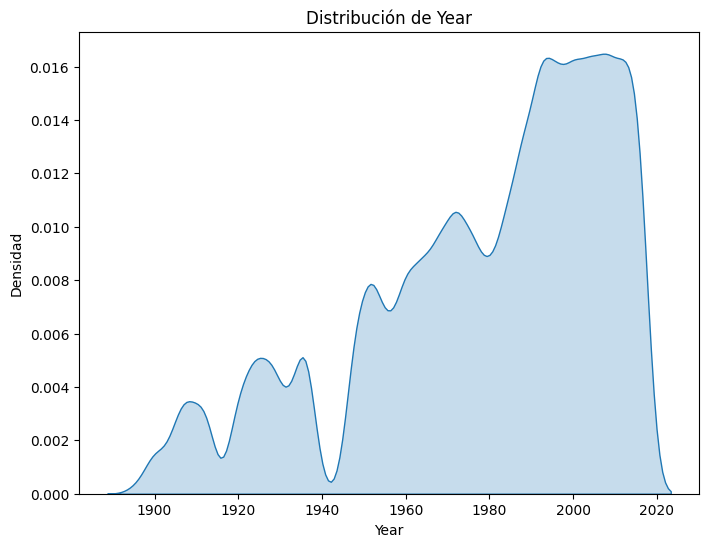

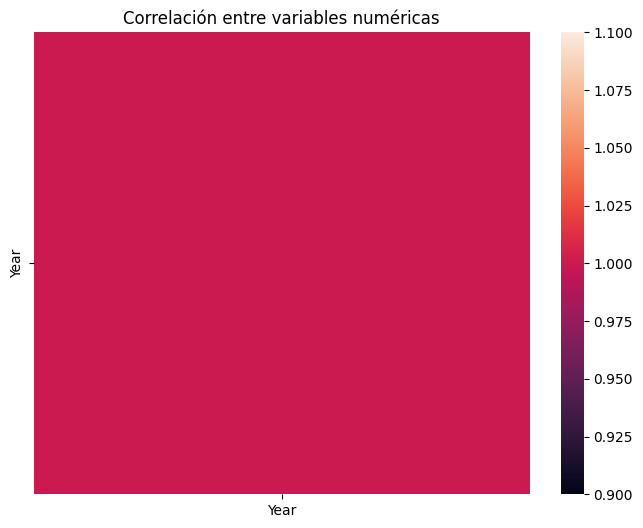

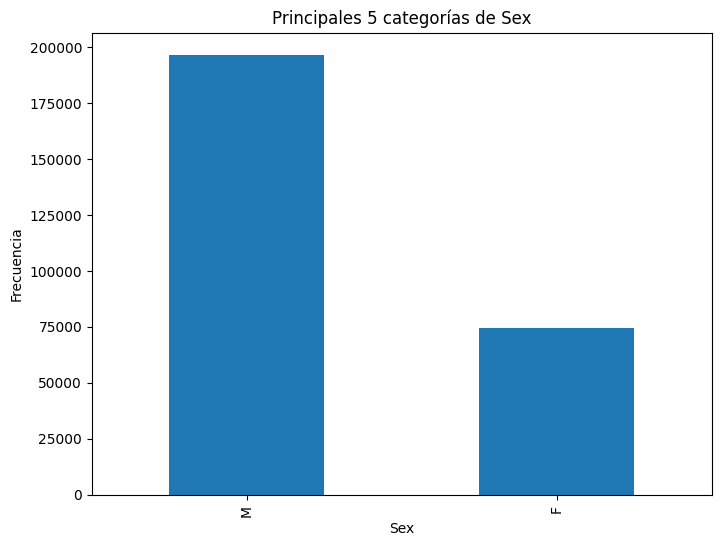

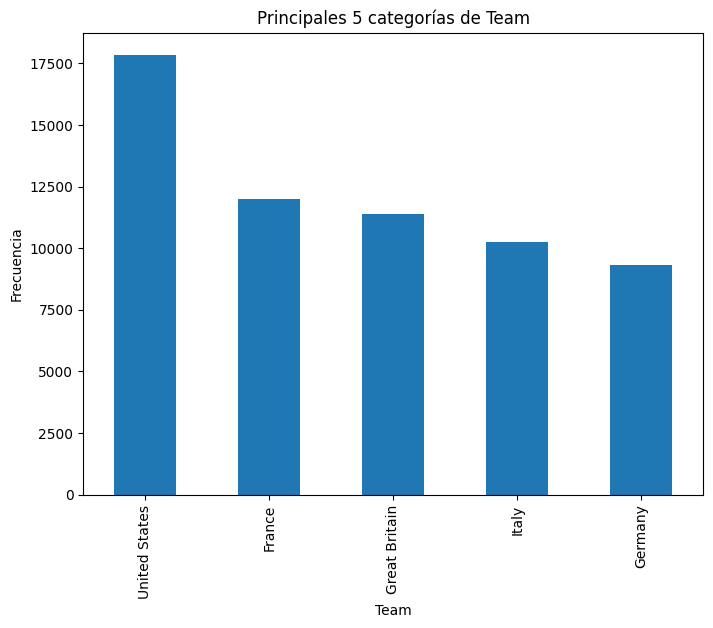

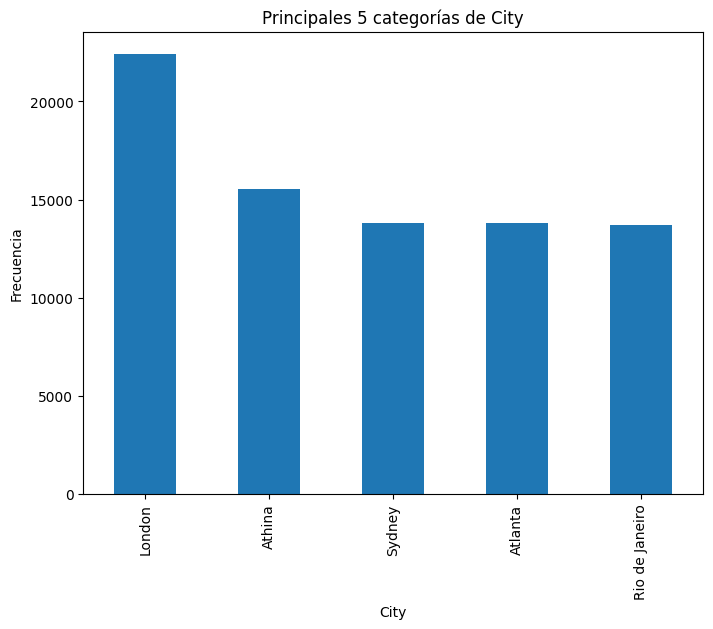

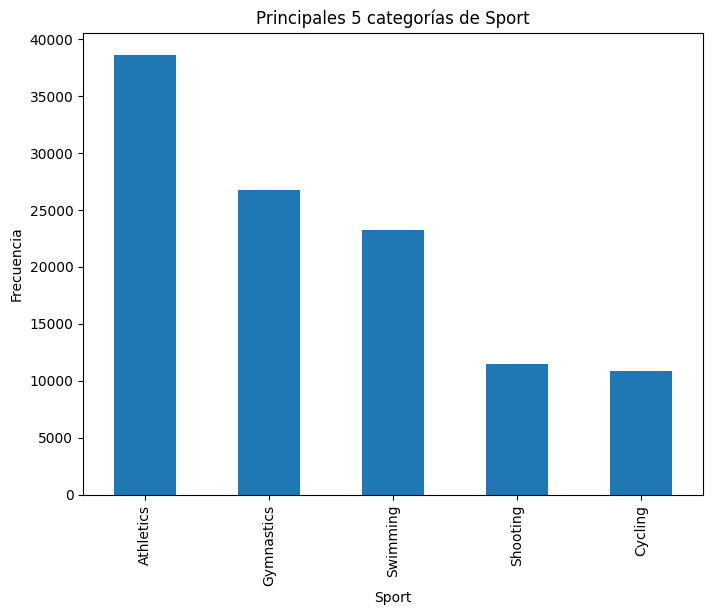

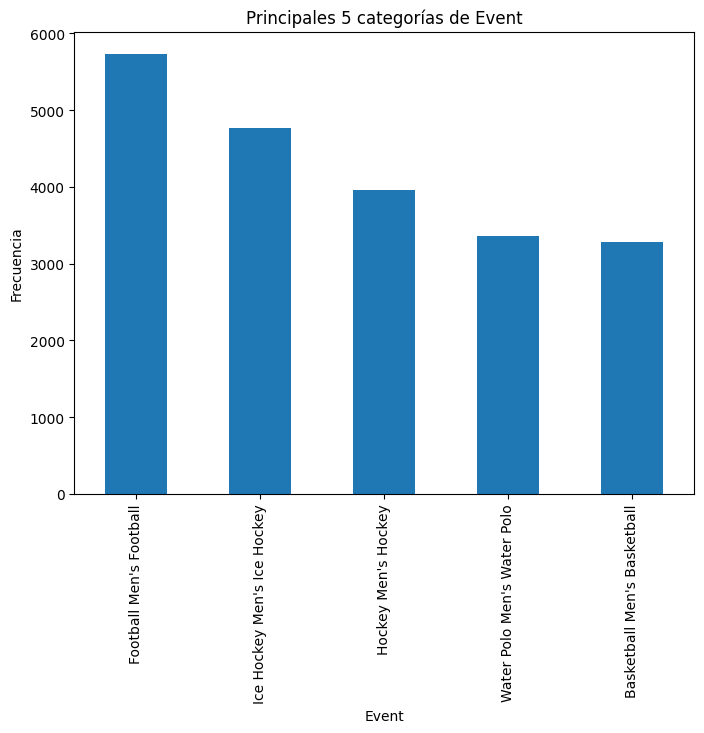

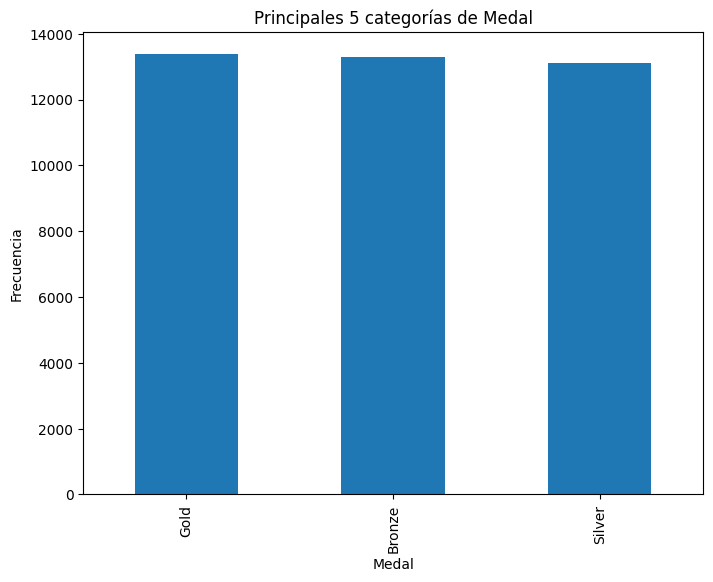

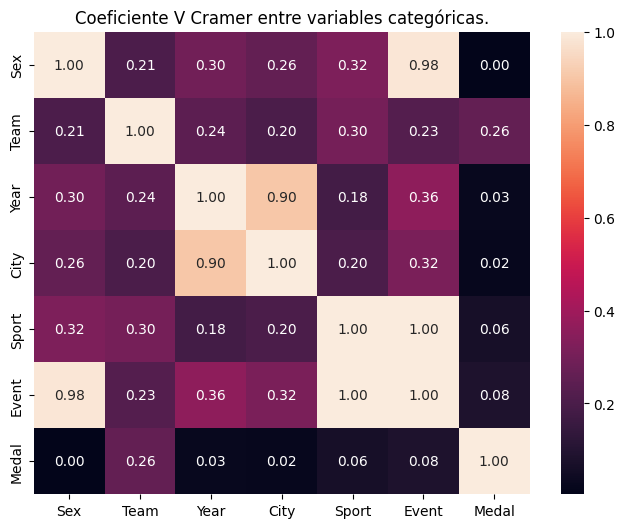

In [ ]:
profiler.plot_vars(variables = ['Sex','Team','Year','City','Sport','Event','Medal'])

**A modo de resumen del análisis del EDA, se tiene lo siguiente:**

1. Variables Numéricas:
* La variable 'ID' es un identificador único para cada registro y parece tener una distribución uniforme.
La variable 'Year' muestra que los datos abarcan desde 1896 hasta 2016. No hay valores negativos ni outliers evidentes.

2. Variables Categóricas:
* 'Name' posee los nombres de los atletas
* 'Sex' tiene dos categorías que representar el sexo del participante.
* 'Season' tiene dos categorías, "Summer" y "Winter". Representan los juegos olimpicos de invierno o verano.
* 'Team' sus categrías representan los equipos participantes (países)
* 'Games' sus categorías representan los nombres de los juegos (Ej: 'London 2023')
* 'Medal' es una variable categórica con 3 categorías. Representan la medalla de oro, plata y bronce.
* Las categorías de la variable 'Sport' representan los distintos deportes.
* 'Event' contiene los nombres de los eventos (competencias)

3. Valores Nulos:
* La columna 'Medal' tiene 231,333 valores nulos que requerirán atención. Otras columnas no parecen tener valores nulos.

4. Datos Duplicados:
* Todas las columnas del resumen poseen datos duplicados, pues todas tienen menor cantidad de valores únicos que el numero de filas del dataframe (son categorías). Solo ID y nombre poseen valores únicos (pueden ser usados como índices).

5. Relaciones o Patrones Visuales:
* En la matriz de coeficientes v de cramer, se puede observar que la variable "Event" esta muy relacionada con la variable 'Sex' y 'Sport'.
* Se puede observar en el gráfico de distribución por año que hay menor cantidad de datos por los años 1910-20 y 1940-50.

6. Anomalías Notables o Preocupantes:
* La columna 'Medal' tiene una cantidad sustancial de valores nulos.
* La columna 'age-height-weight' esta compuesta por un conjunto de distintos valores (no atómica).

### 3.- Creación de clusters y anomalías

#### **Clustering**

Para generar clusters a partir de los datos, se desarrolló el método `make_clusters`. Este método facilita la aplicación de la técnica del codo para evaluar el número óptimo de clusters y permite visualizarlos mediante una reducción de dimensiones. Se realizaron pruebas en dos escenarios: uno que incluye tanto variables numéricas como categóricas, y otro que utiliza solo variables numéricas. Esto se hizo con el fin de comparar el rendimiento del método al considerar o no las variables categóricas.

Primero, para aplicar el método, es necesario realizar un preprocesamiento de los datos utilizando los métodos `clean_data` y `scale`, los cuales limpian y escalan o transforman los datos, respectivamente. Después de este preprocesamiento, se procedió a generar los clusters. Para ello, se aplicó el método del codo con el objetivo de determinar la cantidad óptima de clusters. Dado que no fue posible implementar un solver que proporcionara directamente el número óptimo de clusters, se obtuvo este valor de manera gráfica. En este contexto, el parámetro `num_clusters` del método se fijó en 5 después de realizar varias pruebas con los datos, donde se observó que el resultado de la técnica del codo siempre indicaba ese valor.

Posteriormente, se empleó el algoritmo de `Kmeans` para generar los clusters. El propósito principal de este algoritmo es particionar un conjunto de datos en k grupos de manera que la variabilidad intra-cluster sea mínima. Cada cluster está representado por un centroide, que es la media de todas las observaciones en el cluster. Finalmente, se utilizó el algoritmo de `t-SNE` para realizar una reducción de dimensionalidad a 2 dimensiones, lo que permitió visualizar los clusters mediante un mapa de clusters. A continuación, se presentan los resultados de estas implementaciones.

**Caso 1: Variables numéricas y categóricas**

In [ ]:
# Limpieza de la data completa
columnas = list(olimpiadas_df_reduced.columns)
profiler.clean_data(variables=columnas)

Carpeta 'clean_data' creada con éxito en el directorio 'EDA_11-11-2023'.
Datos limpiados y procesados guardados en EDA_11-11-2023/clean_data/data.csv


In [ ]:
data_clean = pd.read_csv(f'/content/EDA_{date.today().strftime("%d-%m-%Y")}/clean_data/data.csv')
data_clean.head()

,Sex,Team,Games,Year,Season,City,Sport,Event,Medal,age,height,weight
0,M,Finland,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,28.0,184.0,85.0
1,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,28.0,175.0,64.0
2,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,28.0,175.0,64.0
3,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,28.0,175.0,64.0
4,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,28.0,175.0,64.0


In [ ]:
# Escalamiento de las variables numéricas y transformación de las variables categóricas
scaler_list = [OneHotEncoder(sparse_output=False,
                          drop="if_binary",
                            handle_unknown="ignore")]
profiler.scale(scaler_list=scaler_list)

Carpeta 'scale' creada con éxito en el directorio 'EDA_11-11-2023'.
Datos escalados y transformados guardados en EDA_11-11-2023/scale/scaled_features.csv


In [ ]:
data_clean_scale = pd.read_csv(f'/content/EDA_{date.today().strftime("%d-%m-%Y")}/scale/scaled_features.csv')
data_clean_scale.head()

,Year,age,height,weight,Sex_M,Team_Afghanistan,Team_Algeria,Team_Amateur Athletic Association,Team_Aphrodite,Team_Argentina,...,"Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle",Medal_Bronze,Medal_Gold,Medal_Silver
0,0.983826,0.465139,0.610934,0.590086,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.440884,0.465139,0.509499,0.438115,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.440884,0.465139,0.509499,0.438115,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.440884,0.465139,0.509499,0.438115,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.440884,0.465139,0.509499,0.438115,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Carpeta 'clusters' creada con éxito en el directorio 'EDA_11-11-2023'.


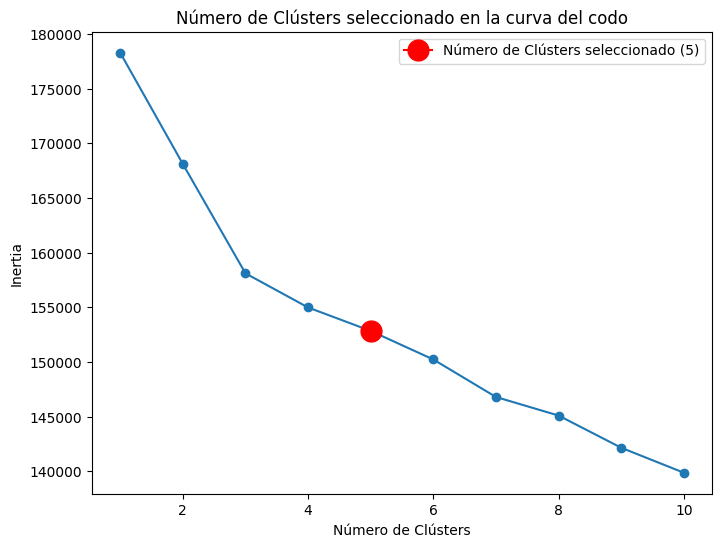

<Figure size 640x480 with 0 Axes>

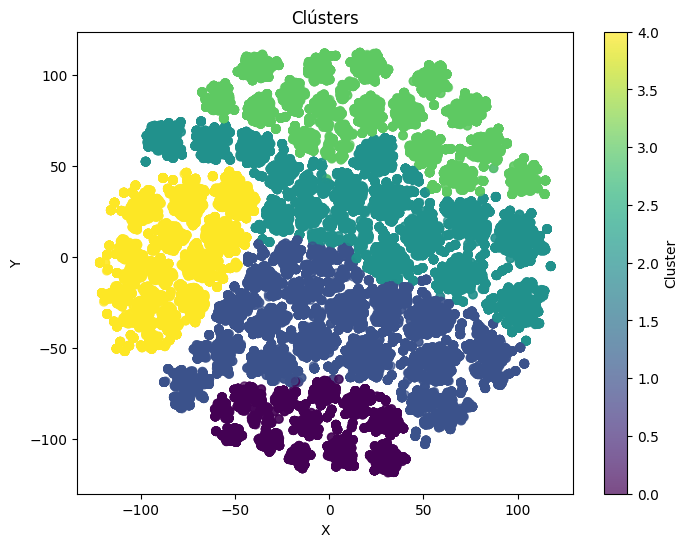

Datos con etiquetas de clúster guardados en EDA_11-11-2023/clusters/data_clusters.csv


<Figure size 640x480 with 0 Axes>

In [ ]:
# Generación de los clusters de la data
num_clusters = 5
profiler.make_clusters(num_clusters=num_clusters)

**Caso 2: Variables numéricas**

In [ ]:
# Escalamiento de las variables numéricas
profiler.scale(scaler_list=None)

La carpeta 'scale' ya existe en el directorio 'EDA_11-11-2023'.
Datos escalados y transformados guardados en EDA_11-11-2023/scale/scaled_features.csv


In [ ]:
data_clean_scale = pd.read_csv(f'/content/EDA_{date.today().strftime("%d-%m-%Y")}/scale/scaled_features.csv')
data_clean_scale.head()

,Year,age,height,weight,Sex,Team,Games,Season,City,Sport,Event,Medal
0,0.983826,0.465139,0.610934,0.590086,M,Finland,2014 Winter,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1,0.440884,0.465139,0.509499,0.438115,M,Finland,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
2,0.440884,0.465139,0.509499,0.438115,M,Finland,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
3,0.440884,0.465139,0.509499,0.438115,M,Finland,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
4,0.440884,0.465139,0.509499,0.438115,M,Finland,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


La carpeta 'clusters' ya existe en el directorio 'EDA_11-11-2023'.


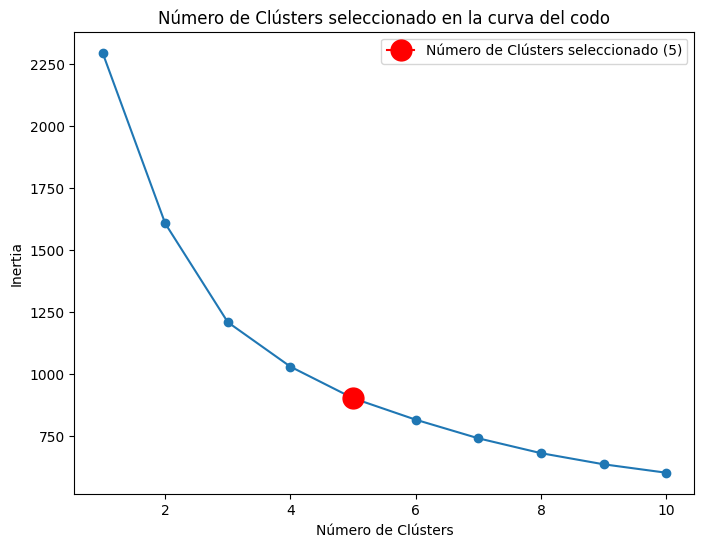

<Figure size 640x480 with 0 Axes>

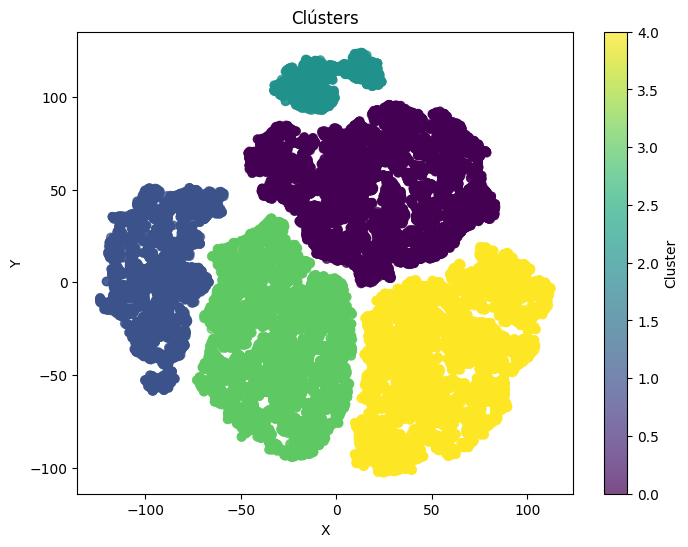

Datos con etiquetas de clúster guardados en EDA_11-11-2023/clusters/data_clusters.csv


<Figure size 640x480 with 0 Axes>

In [ ]:
# Generación de los clusters de la data
num_clusters = 5
profiler.make_clusters(num_clusters=num_clusters)

#### **Anomalías**

Para llevar a cabo la detección y análisis de anomalías, se realizaron pruebas en dos escenarios distintos. En el primer caso, se empleó el conjunto de datos completo, incluyendo las variables categóricas transformadas mediante `OneHotEncoder`. En el segundo caso, se utilizaron exclusivamente las variables numéricas del conjunto de datos después de aplicar el método `clean_data`. Esto permitió comparar el rendimiento del método de detección de anomalías con diferentes cantidades de datos y analizar el impacto en los resultados finales al considerar o no las variables categóricas.

Para aplicar el método `detect_anomalies`, se siguió un preprocesamiento similar al realizado en la sección anterior para la generación de clusters. Primero, se limpió la data con el método `clean_data` y luego se escaló utilizando el método `scale`. En este contexto, se utilizó el método `OneHotEncoder` para transformar las variables categóricas en el primer caso.

Como método de detección de anomalías, se implementó el algoritmo `IsolationForest` de scikit-learn. Este algoritmo se centra en aislar las anomalías en lugar de modelar la normalidad como enfoques tradicionales. Utiliza árboles de decisión aleatorios, cuya cantidad se puede definir mediante el parámetro `n_estimators`. Cada observación se introduce en un árbol de decisión, y se mide la profundidad necesaria para aislar esa observación. Dado que las anomalías suelen requerir menos divisiones al encontrarse en regiones menos pobladas del espacio de características, este enfoque resulta eficiente y escalable, especialmente en conjuntos de datos extensos.

En cuanto a los parámetros del método `IsolationForest`, el único ajuste realizado fue en `n_estimators`, mientras que los demás se mantuvieron en sus valores predeterminados. Este parámetro indica la cantidad de árboles de decisión utilizados para la detección de anomalías. Se ajustó para lograr un equilibrio entre precisión y eficiencia, optimizando el uso de recursos computacionales. Dado que un mayor número de árboles implica un tiempo de procesamiento más prolongado, se redujo el valor predeterminado de `n_estimators` (100) a un total de 20.

A continuación, se presentan los resultados obtenidos:

**Caso 1: Variables numéricas y categóricas**

In [ ]:
# Escalamiento de las variables numéricas y transformación de las variables categóricas
scaler_list = [OneHotEncoder(sparse_output=False,
                          drop="if_binary",
                            handle_unknown="ignore")]
profiler.scale(scaler_list=scaler_list)

La carpeta 'scale' ya existe en el directorio 'EDA_11-11-2023'.
Datos escalados y transformados guardados en EDA_11-11-2023/scale/scaled_features.csv


In [ ]:
data_clean_scale = pd.read_csv(f'/content/EDA_{date.today().strftime("%d-%m-%Y")}/scale/scaled_features.csv')
data_clean_scale.head()

,Year,age,height,weight,Sex_M,Team_Afghanistan,Team_Algeria,Team_Amateur Athletic Association,Team_Aphrodite,Team_Argentina,...,"Event_Wrestling Men's Welterweight, Greco-Roman","Event_Wrestling Women's Featherweight, Freestyle","Event_Wrestling Women's Flyweight, Freestyle","Event_Wrestling Women's Heavyweight, Freestyle","Event_Wrestling Women's Light-Heavyweight, Freestyle","Event_Wrestling Women's Lightweight, Freestyle","Event_Wrestling Women's Middleweight, Freestyle",Medal_Bronze,Medal_Gold,Medal_Silver
0,0.983826,0.465139,0.610934,0.590086,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.440884,0.465139,0.509499,0.438115,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.440884,0.465139,0.509499,0.438115,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.440884,0.465139,0.509499,0.438115,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.440884,0.465139,0.509499,0.438115,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


La carpeta 'anomalies' ya existe en el directorio 'EDA_11-11-2023'.


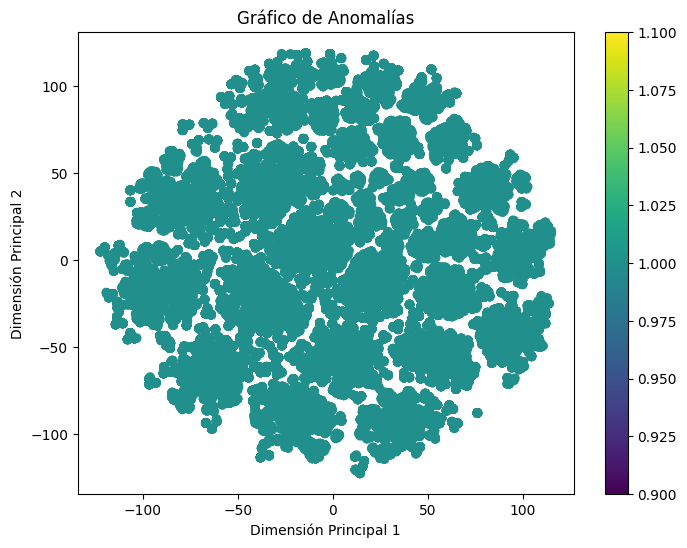

In [ ]:
# Detección de anomalías
anomaly_detectors = [IsolationForest(n_estimators=20)]
profiler.detect_anomalies(anomaly_detectors=anomaly_detectors)

**Caso 2: Variables numéricas**

In [ ]:
# Escalamiento de las variables numéricas
profiler.scale(scaler_list=None)

La carpeta 'scale' ya existe en el directorio 'EDA_11-11-2023'.
Datos escalados y transformados guardados en EDA_11-11-2023/scale/scaled_features.csv


In [ ]:
data_clean_scale = pd.read_csv(f'/content/EDA_{date.today().strftime("%d-%m-%Y")}/scale/scaled_features.csv')
data_clean_scale.head()

,Year,age,height,weight,Sex,Team,Games,Season,City,Sport,Event,Medal
0,0.983826,0.465139,0.610934,0.590086,M,Finland,2014 Winter,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
1,0.440884,0.465139,0.509499,0.438115,M,Finland,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
2,0.440884,0.465139,0.509499,0.438115,M,Finland,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
3,0.440884,0.465139,0.509499,0.438115,M,Finland,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
4,0.440884,0.465139,0.509499,0.438115,M,Finland,1948 Summer,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


La carpeta 'anomalies' ya existe en el directorio 'EDA_11-11-2023'.


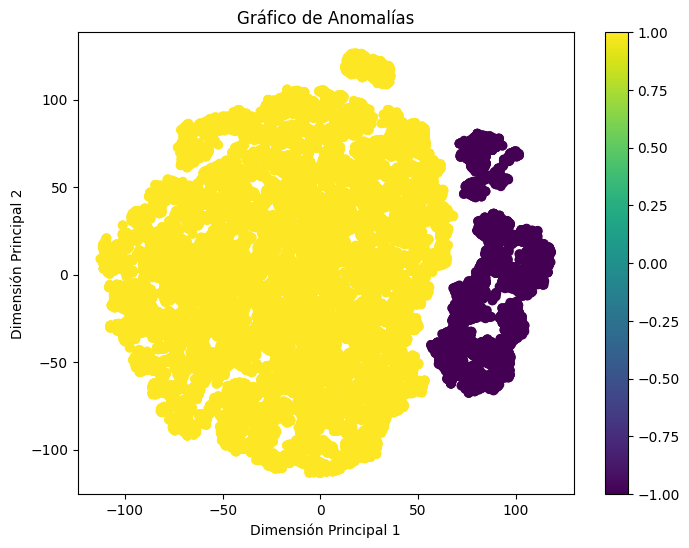

In [ ]:
# Detección de anomalías
anomaly_detectors = [IsolationForest(n_estimators=20)]
profiler.detect_anomalies(anomaly_detectors=anomaly_detectors)

### 4.- Análisis de Resultados

**Clustering**

En el proceso de `KMeans`, la formación de un cluster se basa en asignar datos a grupos de manera que la variabilidad intra-cluster sea mínima. Un dato se considera parte de un cluster si está más cercano al centroide de ese cluster que al centroide de cualquier otro cluster. En esencia, un cluster puede entenderse como un conjunto de observaciones que comparten similitudes entre sí mientras presentan diferencias significativas con respecto a observaciones en otros clusters. La similitud se mide en términos de proximidad en el espacio de características, donde las observaciones comparten características comunes y son "cercanas" entre sí.

A partir de las pruebas realizadas previamente, se pudo observar que en el primer caso, donde se incluyeron tanto variables numéricas como categóricas transformadas por `OneHotEncoder`, los clusters no se presentan claramente separados. Los puntos en el gráfico están mayormente acumulados en una región, dificultando la identificación de grupos distintos sin la ayuda de colores asignados. Esto sugiere que la inclusión de variables categóricas afecta negativamente la formación de clusters visibles.

En contraste, en el segundo caso, donde solo se utilizaron variables numéricas obtenidas después del método `clean_data`, se observó la formación clara de 5 grandes grupos o clusters en el espacio bidimensional. En este resultado, los puntos se agruparon y acumularon en las 5 regiones de los clusters, lo que indica una mejor separación y agrupación.

Estos hallazgos llevan a la conclusión de que el uso de variables categóricas impacta directamente en los resultados de los clusters. Esto se debe a que el método de `KMeans` no maneja de manera óptima datos no numéricos y es altamente sensible a la escala de los datos numéricos. Por lo tanto, se optará por utilizar únicamente variables numéricas para el análisis de clusters en la data.

Finalmente, para realizar un análisis más detallado de los datos presentes en cada cluster, se segmentó el dataset procesado por el método `clean_data` de acuerdo a cada cluster. Esto permitirá estudiar y extraer conclusiones sobre las características compartidas por los datos en cada cluster. Los resultados se presentan a continuación.

In [ ]:
# Carga de dataframe con la información de los clusters
clusters_df = pd.read_csv(f'/content/EDA_{date.today().strftime("%d-%m-%Y")}/clusters/data_clusters.csv')

In [ ]:
c1_index = list(clusters_df[clusters_df['cluster']==0].index)
c1 = data_clean.loc[c1_index]
c1

,Sex,Team,Games,Year,Season,City,Sport,Event,Medal,age,height,weight
0,M,Finland,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,28.0,184.0,85.0
6,M,Norway,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,20.0,176.0,85.0
7,M,Norway,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,20.0,176.0,85.0
8,M,Norway,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,22.0,176.0,85.0
9,M,Norway,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,22.0,176.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30119,M,Netherlands,1992 Summer,1992,Summer,Barcelona,Volleyball,Volleyball Men's Volleyball,Silver,25.0,200.0,93.0
30120,M,Netherlands,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,29.0,200.0,93.0
30122,F,Netherlands,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,22.0,181.0,78.0
30124,M,Netherlands,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze,27.0,197.0,93.0


In [ ]:
c1.describe()

,Year,age,height,weight
count,8452.000000,8452.000000,8452.000000,8452.000000
mean,2001.841931,26.577496,188.038926,87.567913
std,9.473945,4.766271,7.321627,12.254934
min,1964.000000,15.000000,164.000000,62.000000
25%,1994.000000,23.000000,183.000000,79.000000
50%,2004.000000,26.000000,187.000000,86.000000
75%,2010.000000,29.000000,193.000000,94.000000
max,2016.000000,61.000000,223.000000,182.000000


In [ ]:
c2_index = list(clusters_df[clusters_df['cluster']==1].index)
c2 = data_clean.loc[c2_index]
c2

,Sex,Team,Games,Year,Season,City,Sport,Event,Medal,age,height,weight
46,F,Canada,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Women's 4 x 100 metres Medley Relay,Bronze,21.0,173.0,59.0
49,M,Soviet Union,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",Gold,26.0,160.0,62.0
57,M,Ethiopia,1992 Summer,1992,Summer,Barcelona,Athletics,"Athletics Men's 10,000 metres",Bronze,21.0,160.0,50.0
59,F,East Germany,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Team All-Around,Silver,19.0,160.0,48.0
80,M,Great Britain,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Bronze,21.0,175.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30092,F,East Germany,1972 Summer,1972,Summer,Munich,Gymnastics,Gymnastics Women's Uneven Bars,Silver,25.0,158.0,48.0
30099,M,Italy,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 4 x 400 metres Relay,Bronze,20.0,175.0,62.0
30100,M,East Germany,1988 Summer,1988,Summer,Seoul,Boxing,Boxing Men's Lightweight,Gold,22.0,175.0,61.0
30103,M,Yugoslavia,1988 Winter,1988,Winter,Calgary,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver,19.0,179.0,60.0


In [ ]:
c2.describe()

,Year,age,height,weight
count,4246.000000,4246.000000,4246.000000,4246.000000
mean,1980.804051,21.311587,164.689826,57.015309
std,13.422157,3.860304,7.452978,7.678140
min,1948.000000,13.000000,136.000000,28.000000
25%,1972.000000,18.000000,160.000000,52.000000
50%,1980.000000,21.000000,165.000000,58.000000
75%,1992.000000,24.000000,170.000000,62.000000
max,2016.000000,40.000000,183.000000,83.000000


In [ ]:
c3_index = list(clusters_df[clusters_df['cluster']==2].index)
c3=data_clean.loc[c3_index]
c3

,Sex,Team,Games,Year,Season,City,Sport,Event,Medal,age,height,weight
58,M,United States,1924 Winter,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,Silver,23.0,185.0,102.0
62,M,Sweden,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Long Jump,Bronze,19.0,181.0,78.0
63,M,Sweden,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's Triple Jump,Silver,19.0,181.0,78.0
67,M,United States,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's 4 x 400 metres Relay,Gold,19.0,182.0,68.0
82,M,Great Britain,1924 Summer,1924,Summer,Paris,Athletics,Athletics Men's 100 metres,Gold,24.0,183.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29586,M,Poland,1928 Summer,1928,Summer,Amsterdam,Fencing,"Fencing Men's Sabre, Team",Bronze,31.0,170.0,62.0
29657,M,Sweden,1912 Summer,1912,Summer,Stockholm,Athletics,"Athletics Men's 3,000 metres, Team",Silver,22.0,180.0,66.0
29658,M,Sweden,1920 Summer,1920,Summer,Antwerpen,Athletics,"Athletics Men's 3,000 metres, Team",Bronze,30.0,180.0,66.0
29683,M,United States,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Men's Hammer Throw,Bronze,24.0,195.0,92.0


In [ ]:
c3.describe()

,Year,age,height,weight
count,1378.000000,1378.000000,1378.000000,1378.000000
mean,1921.589260,24.671263,176.749637,72.625181
std,11.671973,4.730967,8.186756,12.870540
min,1896.000000,15.000000,150.000000,43.000000
25%,1912.000000,22.000000,171.000000,64.000000
50%,1924.000000,24.000000,177.000000,70.250000
75%,1932.000000,27.000000,183.000000,79.000000
max,1948.000000,58.000000,205.000000,137.000000


In [ ]:
c4_index = list(clusters_df[clusters_df['cluster']==3].index)
c4=data_clean.loc[c4_index]
c4

,Sex,Team,Games,Year,Season,City,Sport,Event,Medal,age,height,weight
1,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,28.0,175.0,64.0
2,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,28.0,175.0,64.0
3,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,28.0,175.0,64.0
4,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,28.0,175.0,64.0
5,M,Finland,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,32.0,175.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30123,M,Poland,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 4 x 100 metres Relay,Silver,21.0,175.0,70.0
30126,F,Soviet Union,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,21.0,168.0,80.0
30127,F,Soviet Union,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,25.0,168.0,80.0
30128,F,Soviet Union,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,33.0,168.0,80.0


In [ ]:
c4.describe()

,Year,age,height,weight
count,7852.000000,7852.000000,7852.000000,7852.000000
mean,1971.073357,25.482298,180.833036,78.182056
std,10.090570,4.969305,7.132283,10.391922
min,1948.000000,15.000000,155.000000,52.000000
25%,1964.000000,22.000000,176.000000,71.000000
50%,1972.000000,25.000000,180.000000,77.000000
75%,1980.000000,28.000000,185.000000,84.000000
max,1992.000000,66.000000,218.000000,163.000000


In [ ]:
c5_index = list(clusters_df[clusters_df['cluster']==4].index)
c5=data_clean.loc[c5_index]
c5

,Sex,Team,Games,Year,Season,City,Sport,Event,Medal,age,height,weight
15,F,Norway,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,23.0,182.0,64.0
18,F,Azerbaijan,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,21.0,165.0,49.0
26,M,United States,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Featherweight, Freestyle",Silver,26.0,165.0,55.0
29,F,Russia,2004 Summer,2004,Summer,Athina,Cycling,Cycling Women's Sprint,Silver,21.0,163.0,60.0
42,M,United States,2014 Winter,2014,Winter,Sochi,Figure Skating,Figure Skating Mixed Team,Bronze,28.0,175.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30116,F,Russia,2008 Summer,2008,Summer,Beijing,Tennis,Tennis Women's Singles,Bronze,23.0,172.0,59.0
30117,F,Germany,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,28.0,167.0,60.0
30121,M,Germany,2016 Summer,2016,Summer,Rio de Janeiro,Hockey,Hockey Men's Hockey,Bronze,29.0,175.0,64.0
30130,F,Russia,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,19.0,171.0,64.0


In [ ]:
c5.describe()

,Year,age,height,weight
count,8204.000000,8204.000000,8204.000000,8204.000000
mean,2004.839834,26.461726,170.706607,64.109824
std,8.180888,4.892169,6.183161,7.577870
min,1972.000000,15.000000,145.000000,39.000000
25%,2000.000000,23.000000,167.000000,59.000000
50%,2006.000000,26.000000,171.000000,64.000000
75%,2012.000000,29.000000,175.000000,70.000000
max,2016.000000,58.000000,188.000000,102.000000


Dado que el clustering se llevó a cabo utilizando únicamente los datos numéricos, el análisis de estos grupos se centrará en dichas variables. Como parte de esta evaluación, se ha visualizado un resumen de las métricas asociadas a cada cluster.

Inicialmente, se destaca la marcada disparidad en los años representados en cada cluster, especialmente en sus medias. Cada grupo exhibe promedios y cuartiles distintos, y la distribución de años dentro de cada cluster es variada, con casos que abarcan desde deportistas del año 2016 hasta aquellos del año 1948, como se observa en el segundo cluster. A pesar de esta diversidad, la variable de años pudo haber desempeñado un papel significativo en la formación de los clusters por parte del algoritmo `Kmeans` al agrupar datos con características temporales similares.

En cuanto a las edades, no se observa una diferencia sustancial entre los clusters, ya que las medias generalmente se encuentran dentro del rango de 21 a 26 años. Esta consistencia puede atribuirse al hecho de que la mayoría de los deportistas son jóvenes, lo que resulta en una variación relativamente baja en las edades dentro de cada cluster en comparación con otras variables.

En lo que respecta a la altura, se evidencia una clara diferenciación entre los clusters, ya que las medias de altura oscilan entre 164[cm] y 188[cm], mostrando una notable variación entre ellos. Esto sugiere que la variable de altura también puede haber influido de manera significativa en la formación de los clusters.

Finalmente, el peso exhibe diferencias notables entre los clusters, especialmente en términos de las medias. El primer cluster presenta la media de peso más alta, 88[kg], coincidiendo con la altura media más alta también. Similarmente, el segundo cluster muestra la media de peso más baja y, al mismo tiempo, la media de altura más baja. Estas discrepancias subrayan la importancia de la variable de peso en la agrupación de los datos.




**Anomalías**

Una anomalía se define como un punto o instancia que se aparta significativamente del patrón general de los demás datos. A diferencia de los outliers, el término "outlier" se utiliza de manera más específica para describir valores atípicos que están fuera del rango esperado o muy alejados de la tendencia general de los datos. En cambio, "anomalía" se utiliza de manera más general para describir cualquier observación inusual o que no sigue el patrón típico del conjunto de datos.

A partir de las pruebas realizadas, se observó que en el primer caso, donde se empleó la data con variables numéricas y categóricas transformadas, no se lograron identificar anomalías. Similar a la situación en el clustering, se formó una gran masa de puntos en una sola región en el espacio bidimensional. En contraste, en el segundo caso, al utilizar solo las variables numéricas, se identificaron puntos clasificados como anomalías. Estos puntos conformaron un grupo particular a la derecha de la mayoría de los datos no anómalos, creando una sección claramente separada.

Estos resultados indican que, al igual que en el caso del clustering, el uso de variables categóricas, incluso después de ser transformadas por `OneHotEncoder`, afecta directamente los resultados de los métodos. Por lo tanto, se optará por utilizar únicamente las variables numéricas obtenidas tras el método `clean_data` para el análisis y la detección de anomalías.

Con el fin de examinar con más detalle los grupos de datos anómalos y no anómalos para distinguir posibles diferencias, se segmentó la data procesada por el método `clean_data`, y los resultados se presentan a continuación.

In [ ]:
# Carga de dataframe con información de los datos anómalos(-1) y normales(1)
anomalies_df = pd.read_csv(f'/content/EDA_{date.today().strftime("%d-%m-%Y")}/anomalies/data_anomalies.csv')

In [ ]:
# Datos no anómalos
no_anomalies_index = list(anomalies_df[anomalies_df['Anomaly_IsolationForest']==1].index)
no_anomalies_df=data_clean.loc[no_anomalies_index]
no_anomalies_df

,Sex,Team,Games,Year,Season,City,Sport,Event,Medal,age,height,weight
0,M,Finland,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,28.0,184.0,85.0
1,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,28.0,175.0,64.0
2,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,28.0,175.0,64.0
3,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,28.0,175.0,64.0
4,M,Finland,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,28.0,175.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30126,F,Soviet Union,1952 Summer,1952,Summer,Helsinki,Athletics,Athletics Women's Shot Put,Gold,21.0,168.0,80.0
30127,F,Soviet Union,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,25.0,168.0,80.0
30129,M,Poland,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,28.0,182.0,82.0
30130,F,Russia,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,19.0,171.0,64.0


In [ ]:
no_anomalies_df.describe()

,Year,age,height,weight
count,25598.000000,25598.000000,25598.000000,25598.000000
mean,1990.073521,25.075553,177.814360,73.176440
std,19.263075,4.081197,9.338754,12.085862
min,1912.000000,15.000000,154.000000,39.000000
25%,1976.000000,22.000000,171.000000,64.000000
50%,1992.000000,25.000000,178.000000,73.000000
75%,2006.000000,28.000000,184.000000,82.000000
max,2016.000000,46.000000,206.000000,115.000000


In [ ]:
# Datos anómalos
anomalies_index = list(anomalies_df[anomalies_df['Anomaly_IsolationForest']==-1].index)
si_anomalies_df=data_clean.loc[anomalies_index]
si_anomalies_df

,Sex,Team,Games,Year,Season,City,Sport,Event,Medal,age,height,weight
18,F,Azerbaijan,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze,21.0,165.0,49.0
34,M,Italy,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Quadruple Sculls,Gold,34.0,188.0,96.0
40,M,Italy,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Coxed Pairs,Silver,33.0,187.0,97.0
47,M,Pakistan,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Gold,38.0,169.0,91.0
55,M,Unified Team,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,Gold,26.0,190.0,125.0
...,...,...,...,...,...,...,...,...,...,...,...,...
30096,M,Lithuania,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Bronze,27.0,218.0,115.0
30110,M,Yugoslavia,1956 Summer,1956,Summer,Melbourne,Water Polo,Water Polo Men's Water Polo,Silver,22.0,186.0,93.0
30111,F,Belarus,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's Discus Throw,Bronze,35.0,183.0,100.0
30112,F,Belarus,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's Discus Throw,Gold,39.0,183.0,100.0


In [ ]:
si_anomalies_df.describe()

,Year,age,height,weight
count,4534.000000,4534.000000,4534.000000,4534.000000
mean,1976.330834,27.440229,176.626599,76.965262
std,34.279266,8.416016,17.307683,25.697996
min,1896.000000,13.000000,136.000000,28.000000
25%,1960.000000,21.000000,161.000000,53.000000
50%,1984.000000,26.000000,177.000000,73.000000
75%,2004.000000,33.000000,190.000000,98.000000
max,2016.000000,66.000000,223.000000,182.000000


Al examinar ambos conjuntos de datos, se destaca que, al considerar únicamente las medias de cada variable, las diferencias son relativamente insignificantes, salvo en el caso del año, donde se observa una variación en las medias entre los grupos. No obstante, la disparidad más notable reside en las desviaciones estándar de cada variable. Específicamente, las variables asociadas a datos anómalos exhiben una varianza considerablemente mayor en sus distribuciones en comparación con los datos no anómalos. Por ejemplo, la desviación estándar del peso en los datos no anómalos es aproximadamente 11.5, mientras que en los datos anómalos es 24.5. Además, se evidencian marcadas diferencias en los valores extremos, aspecto que puede estar vinculado con el concepto de anomalía. Se observa que las variables de los datos anómalos presentan valores mínimos considerablemente menores y valores máximos notoriamente superiores en comparación con los datos no anómalos, a excepción del año, donde ambos conjuntos alcanzan el año 2016.



### 5.- Conclusiones

A partir del análisis de los resultados, se puede concluir que el análisis detallado de los clusters formados con `Kmeans` destaca patrones distintivos en las variables numéricas. Aunque la variable de años muestra gran diversidad, la edad revela coherencia, dada la prevalencia de deportistas jóvenes en todos los grupos. La altura y el peso aparecen como variables significativas, evidenciando diferencias notables entre los clusters. Estos hallazgos sugieren que `Kmeans`, al enfocarse en datos numéricos, logra agrupar efectivamente a los deportistas, destacando las características físicas como elementos clave en la formación de los grupos o clusters.

Por el lado de las anomalías, en resumen se puede decir que al analizar detalladamente los grupos de datos anómalos y no anómalos, se revela una diferencia sustancial en las desviaciones estándar y los valores extremos de las variables, particularmente en el peso. Mientras que las medias muestran variaciones modestas, las desviaciones estándar de las variables asociadas con los datos anómalos indican una mayor dispersión en sus distribuciones. Este fenómeno, junto con la presencia de valores extremos más significativos en los datos anómalos, sugiere la influencia directa de estos puntos inusuales en la variabilidad de los conjuntos. La selección de utilizar solo variables numéricas, en lugar de incluir las categóricas transformadas, se muestra crucial para obtener resultados más claros en la detección de anomalías.

Finalmente y a modo de resumen se puede decir que se cumplieron los objetivos del proyecto. Se logró construir la clase 'Profile' siguiendo la metodología propuesta. Esto permitió realizar un análisis exploratorio de datos completo aplicando tecnicas de limpieza, visualización, agrupamiento, entre otras. La limpieza efectiva abordó posibles problemas como valores nulos, duplicados y variables no atómicas, permitiendo así el correcto resultado de los métodos para análisis posteriores. Se identificaron patrones y relaciones clave, permitiendo una interpretación más clara y significativa de los datos.

**OJO: Si se quieren borrar todos los archivos ejecutar el siguiente bloque de código.**

In [ ]:
# Borrar todos los archivos
profiler.clearGarbage()